<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr==0.1.5

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


# Download sample dataset

In [2]:
import gdown

In [3]:
! gdown https://drive.google.com/uc?id=1W2PZC94sjpA1lS7FN33VoIVleSnnWOaA 

Downloading...
From: https://drive.google.com/uc?id=1W2PZC94sjpA1lS7FN33VoIVleSnnWOaA
To: /content/data.zip
1.49GB [00:08, 168MB/s]


In [4]:
! unzip -qq -o /content/data.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [5]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *epochs*: number of epochs to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number



In [6]:
config = Cfg.load_config_from_name('vgg_transformer')

In [7]:
params = {'data_root':'./data/', 
         'train_annotation':'train_annotation.txt',
         'valid_annotation':'test_annotation.txt',
         'print_every':200,
         'valid_every':15*200,
          'epochs':5,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['weights'] = './weights/transformerocr.pth'

config['device'] = 'cuda:0'

You should train model from our pretrained 

In [8]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=12dTOZ9VP7ZVzwQgVvqBWz5JO5RXXW5NY
To: /root/.cache/gdown/tmpmd52c8xw/dl
773MB [00:06, 128MB/s] 


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


In [9]:
trainer.train()

iter: 000199 - epoch: 000 - train loss: 1.9285
iter: 000399 - epoch: 000 - train loss: 1.1687
iter: 000599 - epoch: 000 - train loss: 0.9153
iter: 000799 - epoch: 000 - train loss: 0.8362
iter: 000999 - epoch: 000 - train loss: 0.7988
iter: 001199 - epoch: 000 - train loss: 0.7578
iter: 001399 - epoch: 000 - train loss: 0.7410
iter: 001599 - epoch: 000 - train loss: 0.7068
iter: 001799 - epoch: 000 - train loss: 0.7034
iter: 001999 - epoch: 000 - train loss: 0.6970
iter: 002199 - epoch: 000 - train loss: 0.6989
iter: 002399 - epoch: 000 - train loss: 0.6778
iter: 002599 - epoch: 000 - train loss: 0.6899
iter: 002799 - epoch: 001 - train loss: 0.6635
iter: 002999 - epoch: 001 - train loss: 0.6479
iter: 002999 - epoch: 001 - val loss: 0.7249
iter: 002999 - epoch: 001 - acc full seq: 0.8313 - acc per char: 0.9156
iter: 003199 - epoch: 001 - train loss: 0.6783
iter: 003399 - epoch: 001 - train loss: 0.6720
iter: 003599 - epoch: 001 - train loss: 0.6799
iter: 003799 - epoch: 001 - train los

Visualize prediction from our trained model


/usr/local/lib/python3.6/dist-packages/vietocr/model/trainer.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


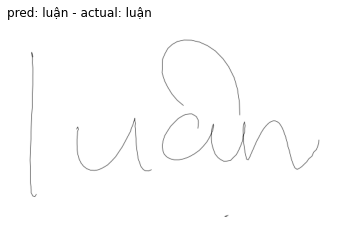

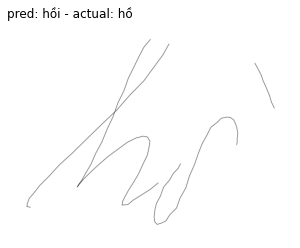

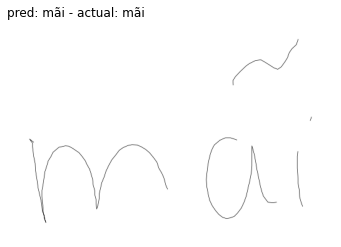

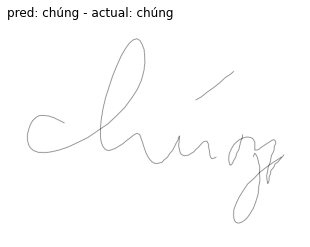

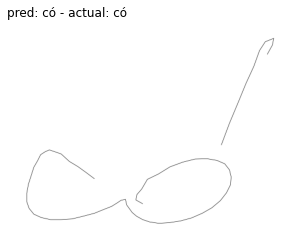

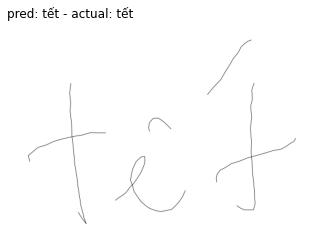

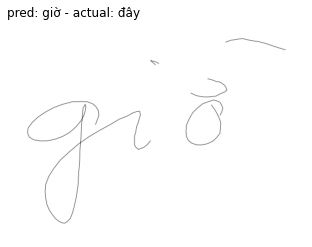

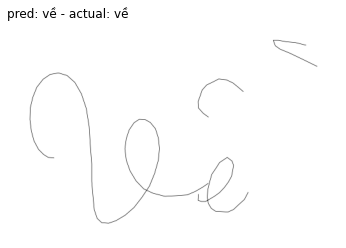

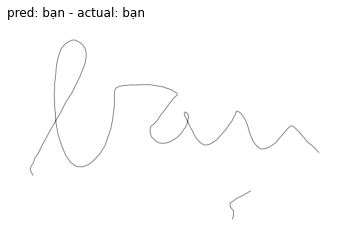

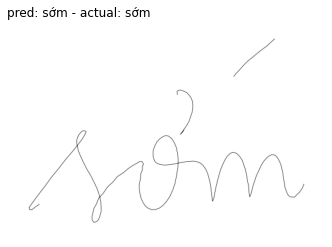

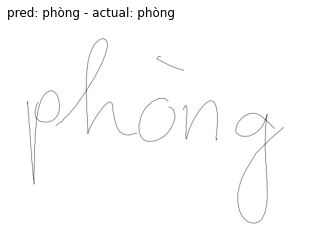

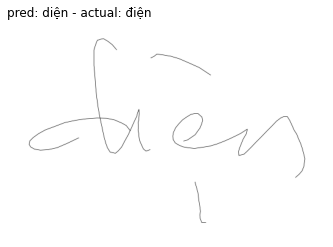

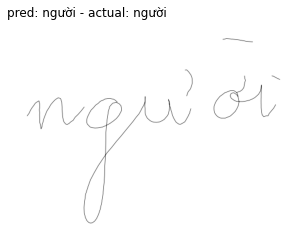

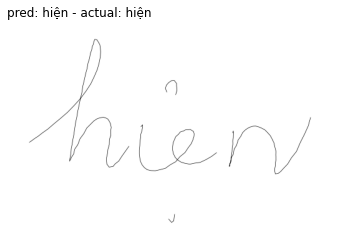

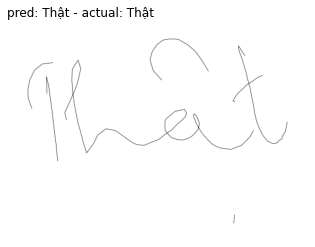

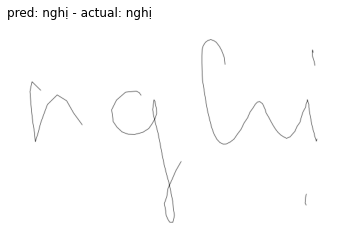

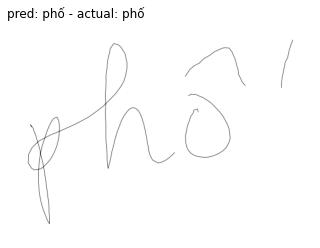

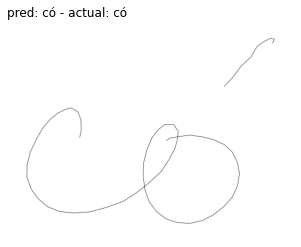

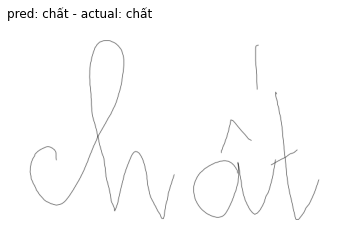

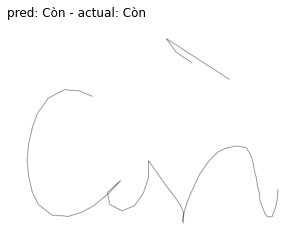

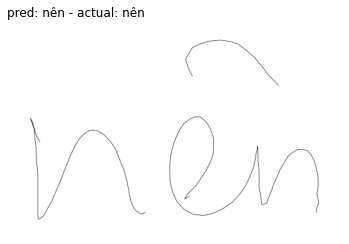

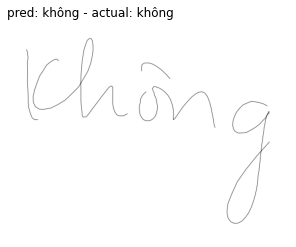

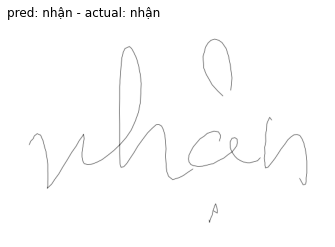

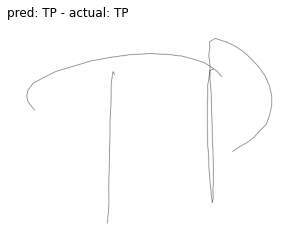

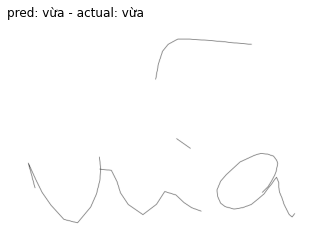

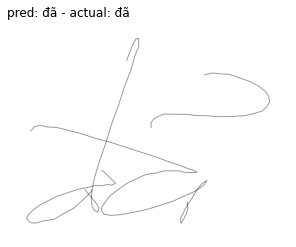

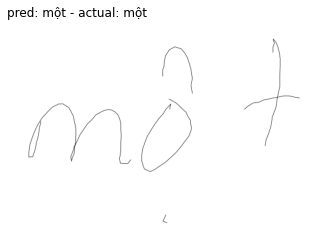

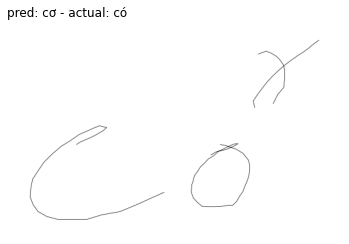

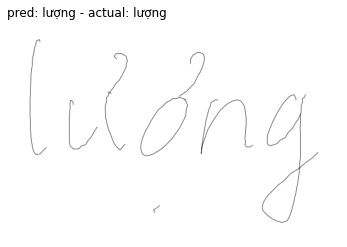

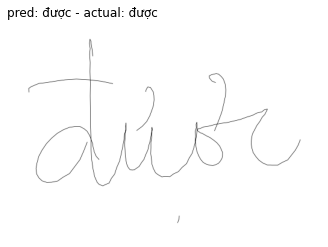

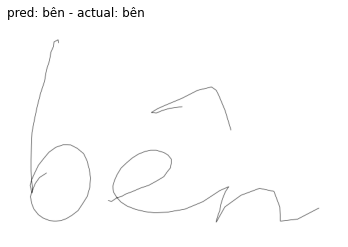

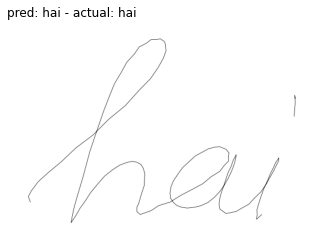

In [27]:
trainer.visualize()

Compute full seq accuracy for full valid dataset

In [11]:
trainer.precision()

(0.8404713804713805, 0.8980588)

# Inference

In [12]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image

In [13]:
config = Cfg.load_config_from_name('vgg_transformer')

change weights to your weights or using default weights from our pretrained model

In [21]:
config['weights'] = './weights/transformerocr.pth'

In [25]:
detector = Predictor(config)

In [32]:
img = './data/InkData_line_processed/20151208_0146_7105_2_tg_5_3.png'
img = Image.open(img)
s = detector.predict(img)
s

'được trường không còn đười nhưng đười nhước người người người trước trước thiện thắc trước thất như tra tra trên.'